In [232]:
%matplotlib notebook
import os, sys
import numpy as np
import matplotlib.pyplot as plt


In [21]:
class myError(Exception):
    pass


In [22]:
## Problem 1
#Specifically, they need you to find the two entries that sum to 2020 and then multiply those two numbers together.
dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p1_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
y = []
for x in xin.split('\n'):
    #print(x.__class__)
    try:
        y.append(float(x))
    except:
        pass
ydata = np.array(y)
nsy = len(ydata)
for i1 in range(nsy-1):
    for i2 in range(i1, nsy):
        if ydata[i1]+ydata[i2] == 2020:
            print('Found at {} and {} product is {}'.format(i1, i2, ydata[i1]*ydata[i2]))
try:
    for i1 in range(nsy-2):
        for i2 in range(i1, nsy-1):
            for i3 in range(i2, nsy):
                if ydata[i1]+ydata[i2]+ydata[i3] == 2020:
                    print('Found at {}, {}, and {} product is {}'.format(
                        i1, i2, i3, ydata[i1]*ydata[i2]*ydata[i3]))
                    raise myError('Big break')
except:
    pass


Found at 14 and 58 product is 440979.0
Found at 52, 114, and 126 product is 82498112.0


In [31]:
def check_pass(linein):
    #1-2 p: prdpdghkckdgpl
    ltr = linein.split(':')[0][-1]
    pswd = linein.split(':')[-1].strip()
    vl = linein.split('-')
    mincount = int(float(vl[0]))
    vll = vl[1].split(' ')
    maxcount = int(float(vll[0]))
    count = 0
    for pos in range(len(pswd)):
        if pswd[pos] == ltr:
            count += 1
            
    if count >= mincount and count <= maxcount:
        return 1
    else:
        return 0
            
def recheck_pass(linein):
    #1-2 p: prdpdghkckdgpl
    ltr = linein.split(':')[0][-1]
    pswd = linein.split(':')[-1].strip()
    vl = linein.split('-')
    pos1 = int(float(vl[0]))
    vll = vl[1].split(' ')
    pos2 = int(float(vll[0]))
    #print(linein)
    #print(len(pswd))
    #print('Password is {}, {}, {}, {}, {}'.format(
    #    pswd, pos1, pos2, pswd[pos1-1],pswd[pos2-1]))
            
    if (pswd[pos1-1] == ltr and pswd[pos2-1] != ltr) or (pswd[pos2-1] == ltr and pswd[pos1-1] != ltr):
        return 1
    else:
        return 0
dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p2_input.txt')
ctvalid = 0
ct2valid = 0
ctall = 0
with open(fn_input, 'r') as fid:
    for i, line in enumerate(fid):
        ctall += 1
        ctvalid += check_pass(line)
        ct2valid += recheck_pass(line)
print('{} passwords, {} valid, err, {} valid'.format(ctall, ctvalid, ct2valid))

1000 passwords, 410 valid, err, 694 valid


In [52]:
def treecount(xin, down = 1, over = 3, idn = 0, iov = 0):
    trees = 0
    numrows = len(xin)
    numcol = len(xin[0])
    #print('{}, {}'.format(numrows, numcol))
    while idn < numrows-1:
        if xin[idn][iov] == '#':
            trees += 1 
        idn += down
        iov += over
        iov %= numcol
        #print(idn, iov)
    
    
    return trees
    
dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p3_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
    
trees = treecount(xin.split('\n'))

#Right 1, down 1.
#Right 3, down 1. (This is the slope you already checked.)
#Right 5, down 1.
#Right 7, down 1.
#Right 1, down 2.
t0 = treecount(xin.split('\n'), down = 1, over = 1)
t1 = treecount(xin.split('\n'), down = 1, over = 3)
t2 = treecount(xin.split('\n'), down = 1, over = 5)
t3 = treecount(xin.split('\n'), down = 1, over = 7)
t4 = treecount(xin.split('\n'), down = 2, over = 1)

print('{} trees found'.format(trees))
print('{}x{}x{}x{}x{}={} trees found'.format(t0,t1,t2,t3,t4,t0*t1*t2*t3*t4))

265 trees found
61x265x82x70x34=3154761400 trees found


In [81]:
def psprt_valid(xst):
    # required field
    flds = ['byr', 'iyr', 'eyr', 'hgt', 'hcl', 'ecl', 'pid', 'cid']
    valid = 1
    for fld in flds[:-1]:
        if not fld in xst:
            valid = 0
    return valid
# byr (Birth Year) - four digits; at least 1920 and at most 2002.
# iyr (Issue Year) - four digits; at least 2010 and at most 2020.
# eyr (Expiration Year) - four digits; at least 2020 and at most 2030.
# hgt (Height) - a number followed by either cm or in:
# If cm, the number must be at least 150 and at most 193.
# If in, the number must be at least 59 and at most 76.
# hcl (Hair Color) - a # followed by exactly six characters 0-9 or a-f.
# ecl (Eye Color) - exactly one of: amb blu brn gry grn hzl oth.
# pid (Passport ID) - a nine-digit number, including leading zeroes.
# cid (Country ID) - ignored, missing or not.
def psprt_full_check(xst):
    # required field
    valid = 1
    for xs in xst:
        xvc = xs.lower().split(':')
        if xvc[0] == 'byr':
            if not 1920<=float(xvc[1])<=2002:
                valid = 0
                #print('bad byr')
        elif xvc[0] == 'iyr':
            if not 2010<=float(xvc[1])<=2020:
                valid = 0
                #print('bad iyr')
        elif xvc[0] == 'eyr':
            if not 2020<=float(xvc[1])<=2030:
                valid = 0
                #print('bad eyr')
        elif xvc[0] == 'hgt':
            if xvc[1].endswith('cm'):
                if not 150<=float(xvc[1][:-2])<=193:
                    valid = 0
                    #print('bad hgt cm')
            elif xvc[1].endswith('in'):
                if not 59<=float(xvc[1][:-2])<=76:
                    valid = 0
                    #print('bad hgt in')
            else:
                valid = 0
                #print('bad hgt')
        elif xvc[0] == 'hcl':
            #print(xvc[1])
            #print(len(xvc[1]))
            if (xvc[1].startswith('#') and len(xvc[1]) == 7):
                try:
                    xjnk = int(xvc[1].replace('#', '0x'), 16)
                except:
                    valid=0
                    #print('bad hcl - hex')
                    pass
            else:
                valid = 0
                #print('bad hcl')
                
        elif xvc[0] == 'ecl':
            if not xvc[1] in ['amb', 'blu', 'brn', 'gry', 'grn', 'hzl', 'oth']:
                valid = 0
                #print('bad ecl')
        elif xvc[0] == 'pid':
            if len(xvc[1]) == 9:
                try:
                    xjnk = int(xvc[1], 10)
                except:
                    valid=0
                    #print('bad pid - value')
                    pass
            else:
                valid = 0
                #print('bad pid')
        
    return valid
            

        
        
    
#     flds = ['byr', 'iyr', 'eyr', 'hgt', 'hcl', 'ecl', 'pid', 'cid']
#     valid = 1
#     for fld in flds[:-1]:
#         if not fld in xst:
#             valid = 0
#     return valid
    
dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p4_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
validcount = 0
fullcount = 0
badct = 0
for xst in xin.split('\n\n'):
    vchk = psprt_valid(xst.replace('\n', ' '))
    validcount += vchk
    if vchk == 1:
        fchk = psprt_full_check(xst.replace('\n', ' ').split(' '))
        
        fullcount += fchk
        if fchk == -10:
            print(xst.replace('\n', ' ').split(' '))
            badct += 1
            if badct>500:
                raise myError('I only want 5')
          
            
    
print('{} valid, {} fully'.format(validcount, fullcount))

230 valid, 156 fully


In [88]:
dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p5_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()

    
xint = []
#BFFFBBFRRR
for xv in xin[:-1].split('\n'):
    xint.append(int(xv.replace('B', '1').replace('F', '0').replace('R', '1').replace('L', '0'), 2))
xseat = np.sort(np.array(xint))
idmyseat = np.diff(xseat).argmax()
print('Max seat is {}'.format(xseat[-1]))
print('My seat is {}'.format(xseat[idmyseat]+1))
                

Max seat is 955
My seat is 569


In [94]:
import string

def count_yeses(groupleters):
    alpha = string.ascii_lowercase
    ct = 0
    for ia in range(26):
        
        if alpha[ia] in groupleters:
            ct += 1
    return ct
def count_yesall(groupleters):
    
    alpha = string.ascii_lowercase
    ct = 0
    nindiv = len(groupleters)
    for ia in range(26):
        tt = 1
        for indiv in range(nindiv):
            if len(groupleters[indiv]) > 0:
                if not alpha[ia] in groupleters[indiv]:
                    tt = 0
                    break
        ct += tt
    return ct


dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p6_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
xct = []
xct2 = []
for xv in xin.split('\n\n'):
    xct.append(count_yeses(xv.replace('\n', '')))
    xct2.append(count_yesall(xv.split('\n')))
    
print('All the yeses: {}, yeses to all: {}'.format(np.sum(np.array(xct)), np.sum(np.array(xct2))))
    


All the yeses: 6430, yeses to all: 3125


In [116]:
# plaid magenta bags contain 2 clear lavender bags, 3 clear teal bags, 4 vibrant gold bags.
# light teal bags contain 4 drab magenta bags, 2 dull crimson bags, 3 posh brown bags.
# wavy gray bags contain 3 dark aqua bags.

def bagemall(xvc, lookingfor='shiny gold', incount=0, already_done = ''):
    
    outerbaglist = []
    #build the list of all outer bags
    for xv in xvc:
        if len(xv) > 8:
            xvbagsplit1 = xv.split('contain')
            if lookingfor in xvbagsplit1[1]:
                outerbag_lcl = xvbagsplit1[0].strip()[:-5]
                if outerbag_lcl in already_done:
                    #print('Skipping it {}'.format(xv))
                    skipper = 1
                else:
                    already_done = already_done+'{}\n'.format(outerbag_lcl)
                    incount += 1
                    #print('{} :: {}'.format(incount, xv))
                    incount, already_done = bagemall(xvc, lookingfor=outerbag_lcl, incount=incount, already_done=already_done)
                
    return incount, already_done

def countin(xvc, lookingfor='shiny gold'):
    ct = 0
    for xv in xvc:
        if xv.startswith(lookingfor):
            xvsplt = xv.split('contain')
            xvin = (xvsplt[1]).split(',')
            for xvini in xvin:
                #print(xvini)
                xvbi = xvini.strip()[:-1].split(' ')
                if len(xvbi) == 4:
                    bagct = int(xvbi[0], base=10)
                    bag = xvbi[1]+' '+xvbi[2]
                    #print('.{}.'.format(bag))
                    baginct = countin(xvc, lookingfor=bag)
                    ct += bagct + bagct*baginct
    return ct
                
                
        
#         if len(xvbagsplit1[0]) > 5:
            
#             outerbaglist.append(outerbag_lcl)
#     #check the inner bags, if its the target, add one
#     for bag in outerbaglist:
#         print(bag)
    
#     for xv in xvc:
#         if len(xv)>10:
#             xvbagsplit1 = xv.split('contain')
#             if len(xvbagsplit1[1]) > 5:
                
            
    
    
    
    
    
    
    
    
dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p7_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
    
xvc = xin.split('\n')

ct_sgold, _ = bagemall(xvc, lookingfor='shiny gold')
print('{} ways to make shiney gold'.format(ct_sgold))
sg_bags = countin(xvc)

print('Shine gold bags have {} bags inside'.format(sg_bags))
                
                

208 ways to make shiney gold
Shine gold bags have 1664 bags inside


In [145]:
# jmp +1
# acc -15
# acc +14
# acc +18
# jmp +443
# jmp +286
# acc +27
#Run your copy of the boot code. Immediately before any instruction is executed a second time, 
#what value is in the accumulator?


def runbootcode(xvc):
    progress = []
    accum = 0
    final_step = len(xvc)
    steps = []
    istep = 0
    progress.append({'step':istep, 'acc':accum})
    while True:
        if istep in steps or istep >= final_step or istep < 0:
            #print('{} dup steps'.format(istep in steps))
            #print('{} completed steps'.format(istep >= final_step))
            #print('{} less than zero'.format(istep < 0))
            if istep >= final_step:
                print(progress[-3:])
            break
        steps.append(istep)
        xv = xvc[istep].split(' ')
        #print(xv)
        
        if xv[0] == 'acc':
            accum += int(xv[1], base=10)
            istep += 1
            
        elif xv[0] == 'jmp':
            istep += int(xv[1], base=10)
        else:
            istep += 1
        progress.append({'step':istep, 'acc':accum})
    #print(progress)
    return accum, istep
    
def fixbootcode(xvc):
    progress = []
    accum = 0
    final_step = len(xvc)
    steps = np.zeros(final_step, dtype='int')
    istep = 0
    progress.append({'step':istep, 'acc':accum})
    while True:
        if istep >= final_step or istep < 0:
            break
        steps[istep] += 1
        xv = xvc[istep].split(' ')
        #print(xv)
        
        if xv[0] == 'acc':
            accum += int(xv[1], base=10)
            istep += 1
            
        elif xv[0] == 'jmp':
            istep += int(xv[1], base=10)
        else:
            istep += 1
        progress.append({'step':istep, 'acc':accum})
        
        if any(steps > 10):
            idbad = np.where(steps > 1)[0]
            break
    for iflip in idbad:
        
        if xvc[iflip].startswith('jmp'):
            
            xvc[iflip] = 'nop'+xvc[iflip][3:]
            accumchk, istepchk = runbootcode(xvc)
            if istepchk >= final_step:
                print('{} workd jmp --> nop'.format(iflip))
            xvc[iflip] = 'jmp'+xvc[iflip][3:]
        elif xvc[iflip].startswith('nop'):
            xvc[iflip] = 'jmp'+xvc[iflip][3:]
            accumchk, istepchk = runbootcode(xvc)
            if istepchk >= final_step:
                print('{} workd nop --> jmp'.format(iflip))
                
            xvc[iflip] = 'nop'+xvc[iflip][3:]
        
    #print(progress)
    return accumchk, istepchk, iflip

dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p8_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
if xin.endswith('\n'):
    xvc = xin[:-1].split('\n')
else:
    xvc = xin.split('\n')

acc1 = runbootcode(xvc)
print('Accumulator at the return {}'.format(acc1))

acc2,istp, iflip = fixbootcode(xvc)
print(len(xvc))
print('Flipping instruction {}, {} yield {}'.format(iflip, istp, acc2))
#print(xvc[istp])

Accumulator at the return (1501, 47)
[{'step': 634, 'acc': 523}, {'step': 635, 'acc': 509}, {'step': 636, 'acc': 509}]
216 workd jmp --> nop
636
Flipping instruction 628, 98 yield 826


In [165]:
def xmaslist(x25, returnall=False):
    if returnall:
        
        return np.atleast_2d(x25).T+np.atleast_2d(x25)
    else:
        return np.unique((np.atleast_2d(x25).T+np.atleast_2d(x25)).reshape(-1))
    
def xmas_check(xin, xmas_n=25):
    nx = len(xin)
    
    for ix in range(xmas_n, nx):
        xm = xmaslist(xin[ix-25:ix])
        if not xin[ix] in xm:
            print('Worked at {} or {} != xmas({})'.format(
                ix, xin[ix], xin[ix-25:ix]))
            break
    return ix

def xmas_exploit(xin, xindex):
    
    for ix in range(xindex):
        xsum = np.cumsum(xin[ix:xindex])
        if any(xsum == xin[xindex]):
            idx = np.where(xsum == xin[xindex])[0][0]
            print('Worked at {} and {}'.format(ix, idx+ix))
            break
    return xin[ix:ix+idx+1].min() + xin[ix:ix+idx+1].max()


dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p9_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
    
if xin.endswith('\n'):
    xvc = xin[:-1].split('\n')
else:
    xvc = xin.split('\n')
xint = []
for xv in xvc:
    xint.append(int(xv, base=10))
xint = np.array(xint)
xindex = xmas_check(xint)
print('The first non-xmas index is: {} or {}'.format(xindex, xint[xindex]))
xex = xmas_exploit(xint, xindex)
print('The exploit is {}'.format(xex))



Worked at 509 or 27911108 != xmas([31508286 45648996 19727282 21501873 19453401 29109505 20235424 25938841
 22018477 25112387 23640556 24080406 24431041 24870891 25463022 25902872
 27331475 26492970 34968283 33701834 30425385 40437232 33163547 36963835
 35380395])
The first non-xmas index is: 509 or 27911108
Worked at 396 and 412
The exploit is 4023754


In [224]:
def chain_adapters(xin):
    xs = np.sort(xin)
    n1 = np.sum(np.diff(xs) == 1)+1
    n3 = np.sum(np.diff(xs) == 3)+1
    #print(n1, n3)
    return n1*n3

def adapter_count(xin, xp=0):
    if len(xin) == 0:
        return 1
    xt = xin[(xin-xp)<=3]
    #print(xt)
    
    ct = 0
    for ixc in range(len(xt)):
        ct += adapter_count(xin[ixc+1:], xin[ixc])
    #print(xt)
    
    return ct
    
def adp_count(xin, xp=0):
    ct = 1
    #print(xin)
    xu = xin.copy() # np.concatenate([[xp], xin])
    id3 = np.where(np.diff(xu)==3)[0]
    id3 = np.concatenate([[0], id3, [len(xin)-1]])
    #print(id3)
    xp = 0
    for ii in range(1,len(id3)):
        ctl = adapter_count(xu[id3[ii-1]:id3[ii]+1], xp=xp)
        #print('{} from {} has {} routes'.format(xu[id3[ii-1]:id3[ii]+1], xp, ctl))
        ct *= ctl
        xp = xu[id3[ii]-1]
        
    
    
    return ct    



dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p10_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
    
if xin.endswith('\n'):
    xvc = xin[:-1].split('\n')
else:
    xvc = xin.split('\n')
xint = []
for xv in xvc:
    xint.append(int(xv, base=10))
xint = np.array(xint)
xt0 = np.array([16,10,15,5,1,11,7,19,6,12,4])
xt = np.array([28, 33, 18, 42, 31, 14, 46, 20, 48,
               47, 24, 23, 49, 45, 19, 38, 39, 11,
               1, 32, 25, 35, 8, 17, 7, 9, 4, 2, 34,
               10, 3])
print(chain_adapters(xint))
print(adapter_count(np.sort(xt)))
print(adp_count(np.sort(xint)))



2263
19208
396857386627072


<IPython.core.display.Javascript object>


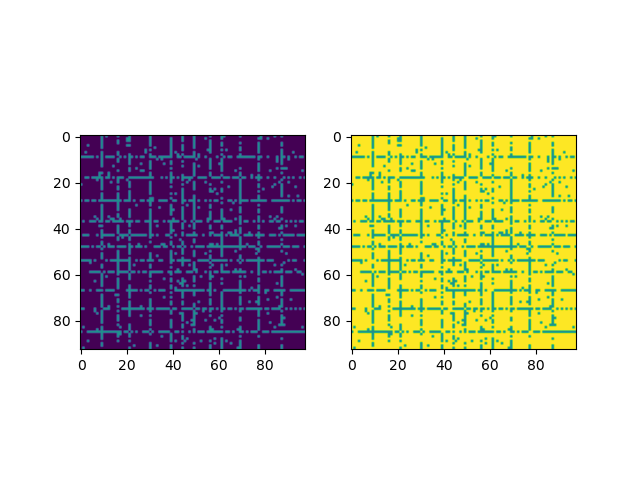

<IPython.core.display.Javascript object>


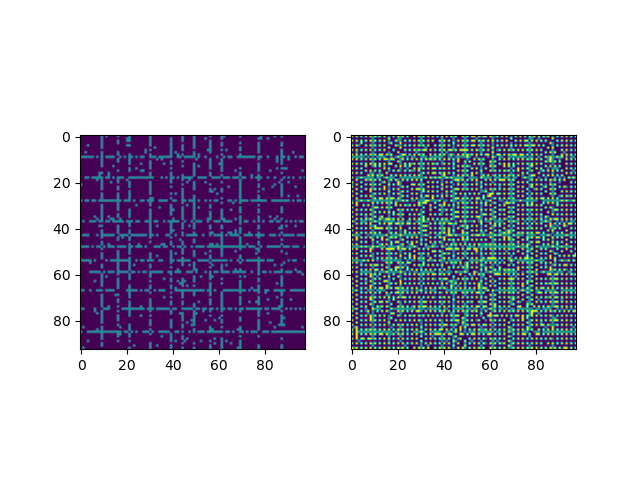

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1  0 -1 ... -1 -1 -1]]


In [240]:
def changemap(xi):
    xo = xi.copy()
    nr, nc = xi.shape
    for irow in range(len(xi)):
        ir0 = np.array([0, irow-1]).max()
        ir1 = np.array([nr, irow+2]).min()
        xr = xi[ir0:ir1,:]
        for icol in range(len(xi[irow])):
            ic0 = np.array([0, icol-1]).max()
            ic1 = np.array([nc, icol+2]).min()
            xrc = xr[:, ic0:ic1]
            if xi[irow, icol]!=0:
                nsum = np.sum(xrc>0)
                if xi[irow, icol]>0 and nsum>=5:
                    xo[irow, icol] = -1
                elif nsum == 0:
                    xo[irow, icol] = 1
    return xo

def newchangemap(xi):
    xo = xi.copy()
    nr, nc = xi.shape
    for irow in range(len(xi)):
        ir0 = np.array([0, irow-1]).max()
        ir1 = np.array([nr, irow+2]).min()
        for icol in range(len(xi[irow])):
            ic0 = np.array([0, icol-1]).max()
            ic1 = np.array([nc, icol+2]).min()
            xrc = xr[:, ic0:ic1]
            if xi[irow, icol]!=0:
                
                nsum = np.sum(xrc>0)
                if xi[irow, icol]>0 and nsum>=5:
                    xo[irow, icol] = -1
                elif nsum == 0:
                    xo[irow, icol] = 1
    return xo
                    
                    
                

dn = '/home/mike/dev/AdventOfCode/aoc2020'
fn_input = os.path.join(dn, 'p11_input.txt')
with open(fn_input, 'r') as fid:
    xin = fid.read()
    
xinp = xin.split('\n')[:-1]

#convert to np array
xia = None
for xr in xinp:
    xx = np.zeros(len(xr), dtype='int')
    for ix in range(len(xr)):
        if xr[ix] == 'L':
            xx[ix] = -1
    if xia is None:
        xia = np.atleast_2d(xx).copy()
    else:
        xia = np.concatenate([xia, np.atleast_2d(xx)], axis=0)
        

fig, axs=plt.subplots(1,2)
_=axs[0].imshow(xia, vmin=-1, vmax=1)
xoa = changemap(xia)
_=axs[1].imshow(xoa, vmin=-1, vmax=1)


done = False
ctr = 0
xic = xia.copy()
while not done:
    ctr += 1
    xoa = changemap(xic)
    if (xoa == xic).all():
        done = True
    else:
        xic = xoa.copy()

fig, axs=plt.subplots(1,2)
_=axs[0].imshow(xia, vmin=-1, vmax=1)
_=axs[1].imshow(xoa, vmin=-1, vmax=1)
    


print(ctr)

In [242]:
print(ctr)
print(np.sum(xoa>0))

101
2329
